In [1]:


import sys
sys.path.append('..')
from Controllers.FLController import *
from Controllers.ILQGController import *
from Controllers.LQGController import *

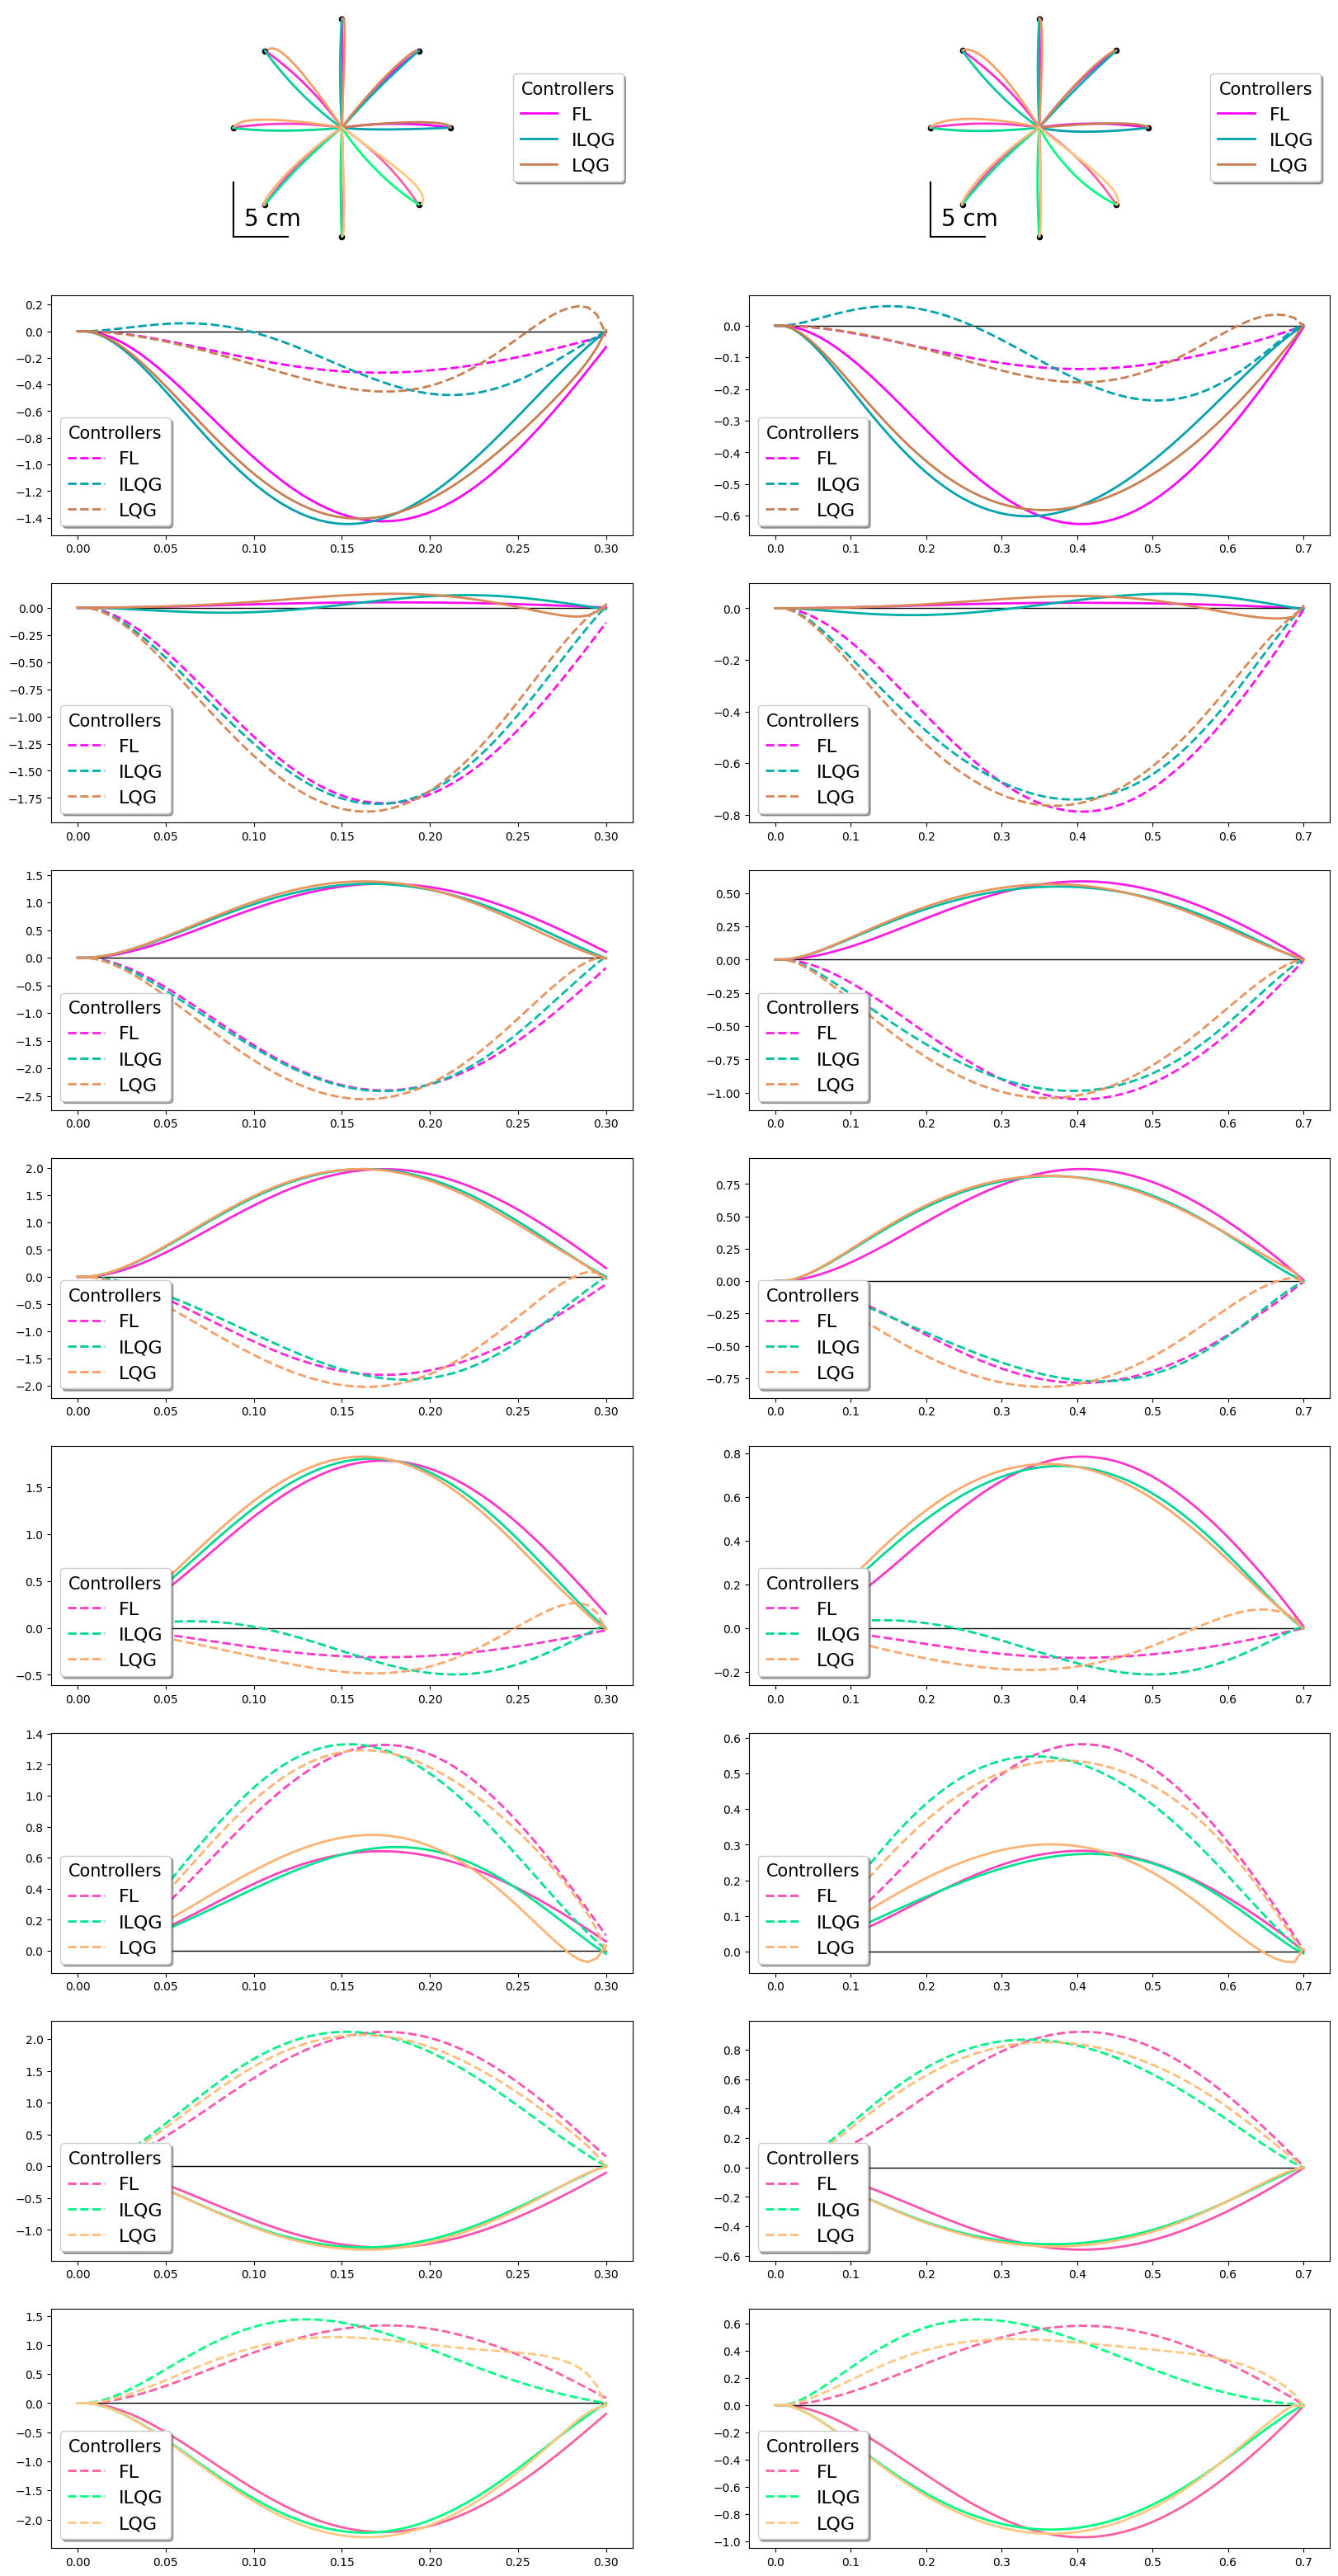

In [2]:
start = np.array([0,35])
d = 10

    # Plot results

Duration = [.3,.7]
fig,ax = plt.subplots(9,len(Duration),figsize=(20, 40))
for k in range(len(Duration)):
    colorlist1 = get_colors_from_colormap(20,"spring")[:8]
    colorlist2 = get_colors_from_colormap(20,"winter")[-8:]
    colorlist3 = get_colors_from_colormap(20,"copper")[-8:]
    for i,angles in enumerate(np.linspace(0,2*pi,9)[:-1]):
        color1,color2,color3 = colorlist1[i],colorlist2[i],colorlist3[i]
        plt.subplot(9,len(Duration),k+1)
        end = start + np.array([d*cos(angles),d*sin(angles)])
        plt.axis("equal")
        X,Y,_,x=Feedback_Linearization(Duration[k],w1=1e4,w2=1e4,w3=1,w4=1,r1 = 1e-7,r2=1e-7,starting_point=start,targets=end,plot = False,Showu=True,Num_iter=60,Delay = 0)
        plt.plot(X,Y,color = color1,linewidth = 2,label = "FL")
        
        X,Y,_,xilqg=ILQG(Duration[k],start=start,targets=end,plot = False)
        plt.plot(X,Y,color = color2,linewidth = 2,label = "ILQG")

        X,Y,_,xlqg=BestLQG(Duration[k],starting_point=start,targets=end,plot = False,Num_iter=60)
        plt.plot(X,Y,color = color3,linewidth = 2,label = "LQG")

        plt.scatter([end[0]],[end[1]],color = "black",s = 20)
        if i == 0 : MultipleLabel()
        plt.subplot(9,len(Duration),k+3+2*i)
        plt.plot(np.linspace(0,Duration[k],60),x[:,2],color = color1,linewidth = 2,label = "FL")
        plt.plot(np.linspace(0,Duration[k],60),np.zeros(60),color = "black",linewidth = 1)
        plt.plot(np.linspace(0,Duration[k],60),x[:,3],color = color1,linewidth = 2,label = "FL",linestyle = "--")
        plt.plot(np.linspace(0,Duration[k],60),xilqg[:,2],color = color2,linewidth = 2,label = "ILQG")
        plt.plot(np.linspace(0,Duration[k],60),xilqg[:,3],color = color2,linewidth = 2,label = "ILQG",linestyle = "--")
        plt.plot(np.linspace(0,Duration[k],60),xlqg[1],color = color3,linewidth = 2,label = "LQG")
        plt.plot(np.linspace(0,Duration[k],60),xlqg[4],color = color3,linewidth = 2,label = "LQG",linestyle = "--")
            
    
        MultipleLabel(side = "lower left")
    plt.subplot(9,len(Duration),k+1)
    delete_axis(ax[0,k])
    delete_ticks(ax[0,k])
    add_scale_cm(-10,25,5,fontsize =20)
plt.show()

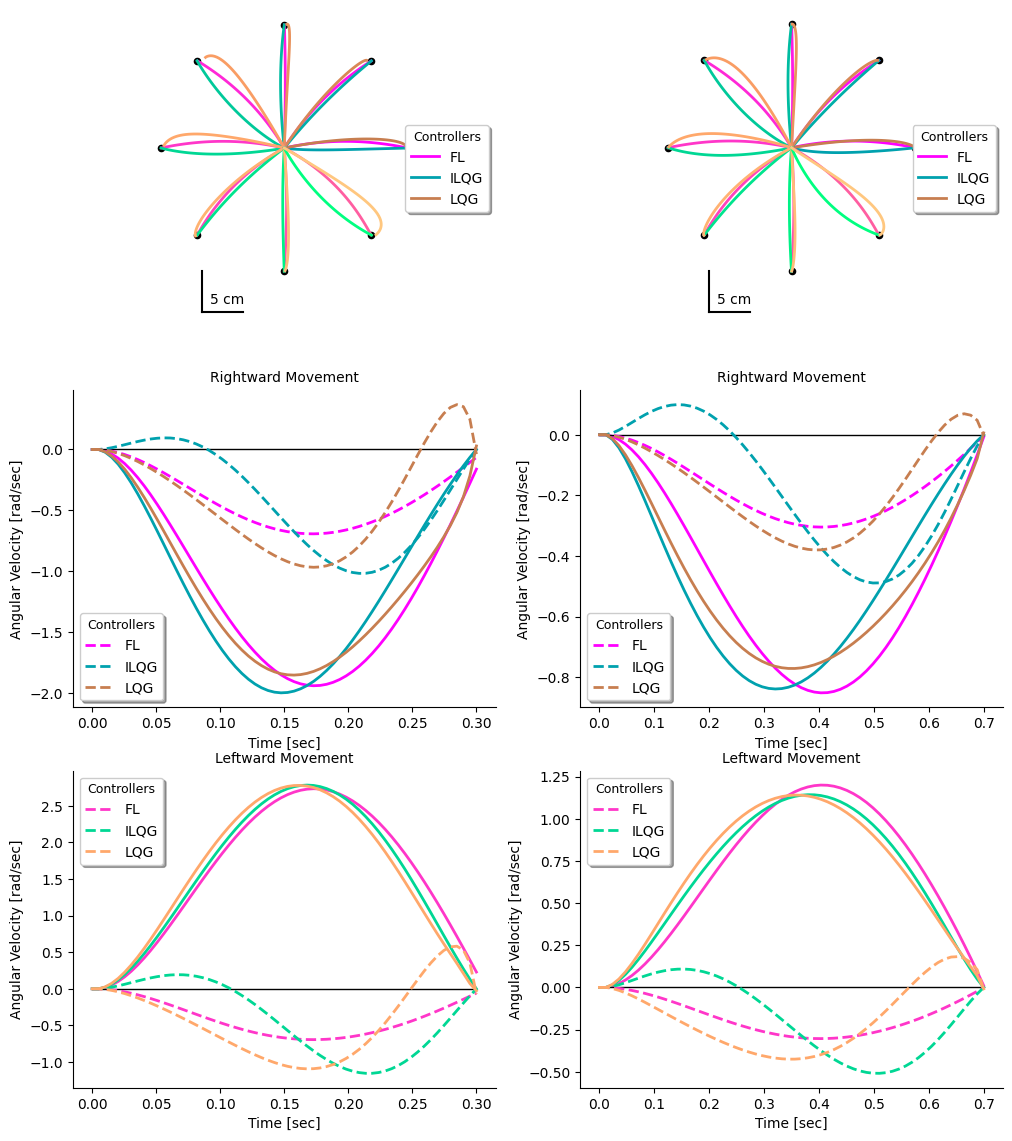

In [3]:
start = np.array([0,35])
d = 15

    # Plot results

Duration = [.3,.7]
fig,ax = plt.subplots(3,len(Duration),figsize=(12, 14))
for k in range(len(Duration)):
    colorlist1 = get_colors_from_colormap(20,"spring")[:8]
    colorlist2 = get_colors_from_colormap(20,"winter")[-8:]
    colorlist3 = get_colors_from_colormap(20,"copper")[-8:]
    for i,angles in enumerate(np.linspace(0,2*pi,9)[:-1]):
        color1,color2,color3 = colorlist1[i],colorlist2[i],colorlist3[i]
        plt.subplot(3,len(Duration),k+1)
        end = start + np.array([d*cos(angles),d*sin(angles)])
        plt.axis("equal")
        X,Y,_,x=Feedback_Linearization(Duration[k],w1=1e4,w2=1e4,w3=1,w4=1,r1 = 1e-7,r2=1e-7,starting_point=start,targets=end,plot = False,Showu=True,Num_iter=60,Delay = 0)
        plt.plot(X,Y,color = color1,linewidth = 2,label = "FL")
        
        X,Y,_,xilqg=ILQG(Duration[k],start=start,targets=end,plot = False)
        plt.plot(X,Y,color = color2,linewidth = 2,label = "ILQG")

        X,Y,_,xlqg=BestLQG(Duration[k],starting_point=start,targets=end,plot = False,Num_iter=60)
        plt.plot(X,Y,color = color3,linewidth = 2,label = "LQG")

        plt.scatter([end[0]],[end[1]],color = "black",s = 20)
        if i == 0 : MultipleLabel(fontsize = 10,title_fontsize=9)
        if i in [0,4]:
            plt.subplot(3,len(Duration),int(k+3+2*i/4))
            plt.plot(np.linspace(0,Duration[k],60),x[:,2],color = color1,linewidth = 2,label = "FL")
            plt.plot(np.linspace(0,Duration[k],60),np.zeros(60),color = "black",linewidth = 1)
            plt.plot(np.linspace(0,Duration[k],60),x[:,3],color = color1,linewidth = 2,label = "FL",linestyle = "--")
            plt.plot(np.linspace(0,Duration[k],60),xilqg[:,2],color = color2,linewidth = 2,label = "ILQG")
            plt.plot(np.linspace(0,Duration[k],60),xilqg[:,3],color = color2,linewidth = 2,label = "ILQG",linestyle = "--")
            plt.plot(np.linspace(0,Duration[k],60),xlqg[1],color = color3,linewidth = 2,label = "LQG")
            plt.plot(np.linspace(0,Duration[k],60),xlqg[4],color = color3,linewidth = 2,label = "LQG",linestyle = "--")
            plt.xlabel("Time [sec]")
            plt.ylabel("Angular Velocity [rad/sec]")
            delete_axis(ax[1,k],sides=["right","top"])
            delete_axis(ax[2,k],sides=["right","top"])
            
            
    
            if i == 0 :
                MultipleLabel(side = "lower left",fontsize = 10,title_fontsize=9)
                plt.title("Rightward Movement",fontsize = 10)
            elif i == 4:
                MultipleLabel(side = "upper left",fontsize = 10,title_fontsize=9)
                plt.title("Leftward Movement",fontsize = 10)
    plt.subplot(3,len(Duration),k+1)
    delete_axis(ax[0,k])
    delete_ticks(ax[0,k])
    add_scale_cm(-10,15,5,fontsize =10)
plt.savefig("FLILQG1.pdf",dpi = 200)
plt.show()

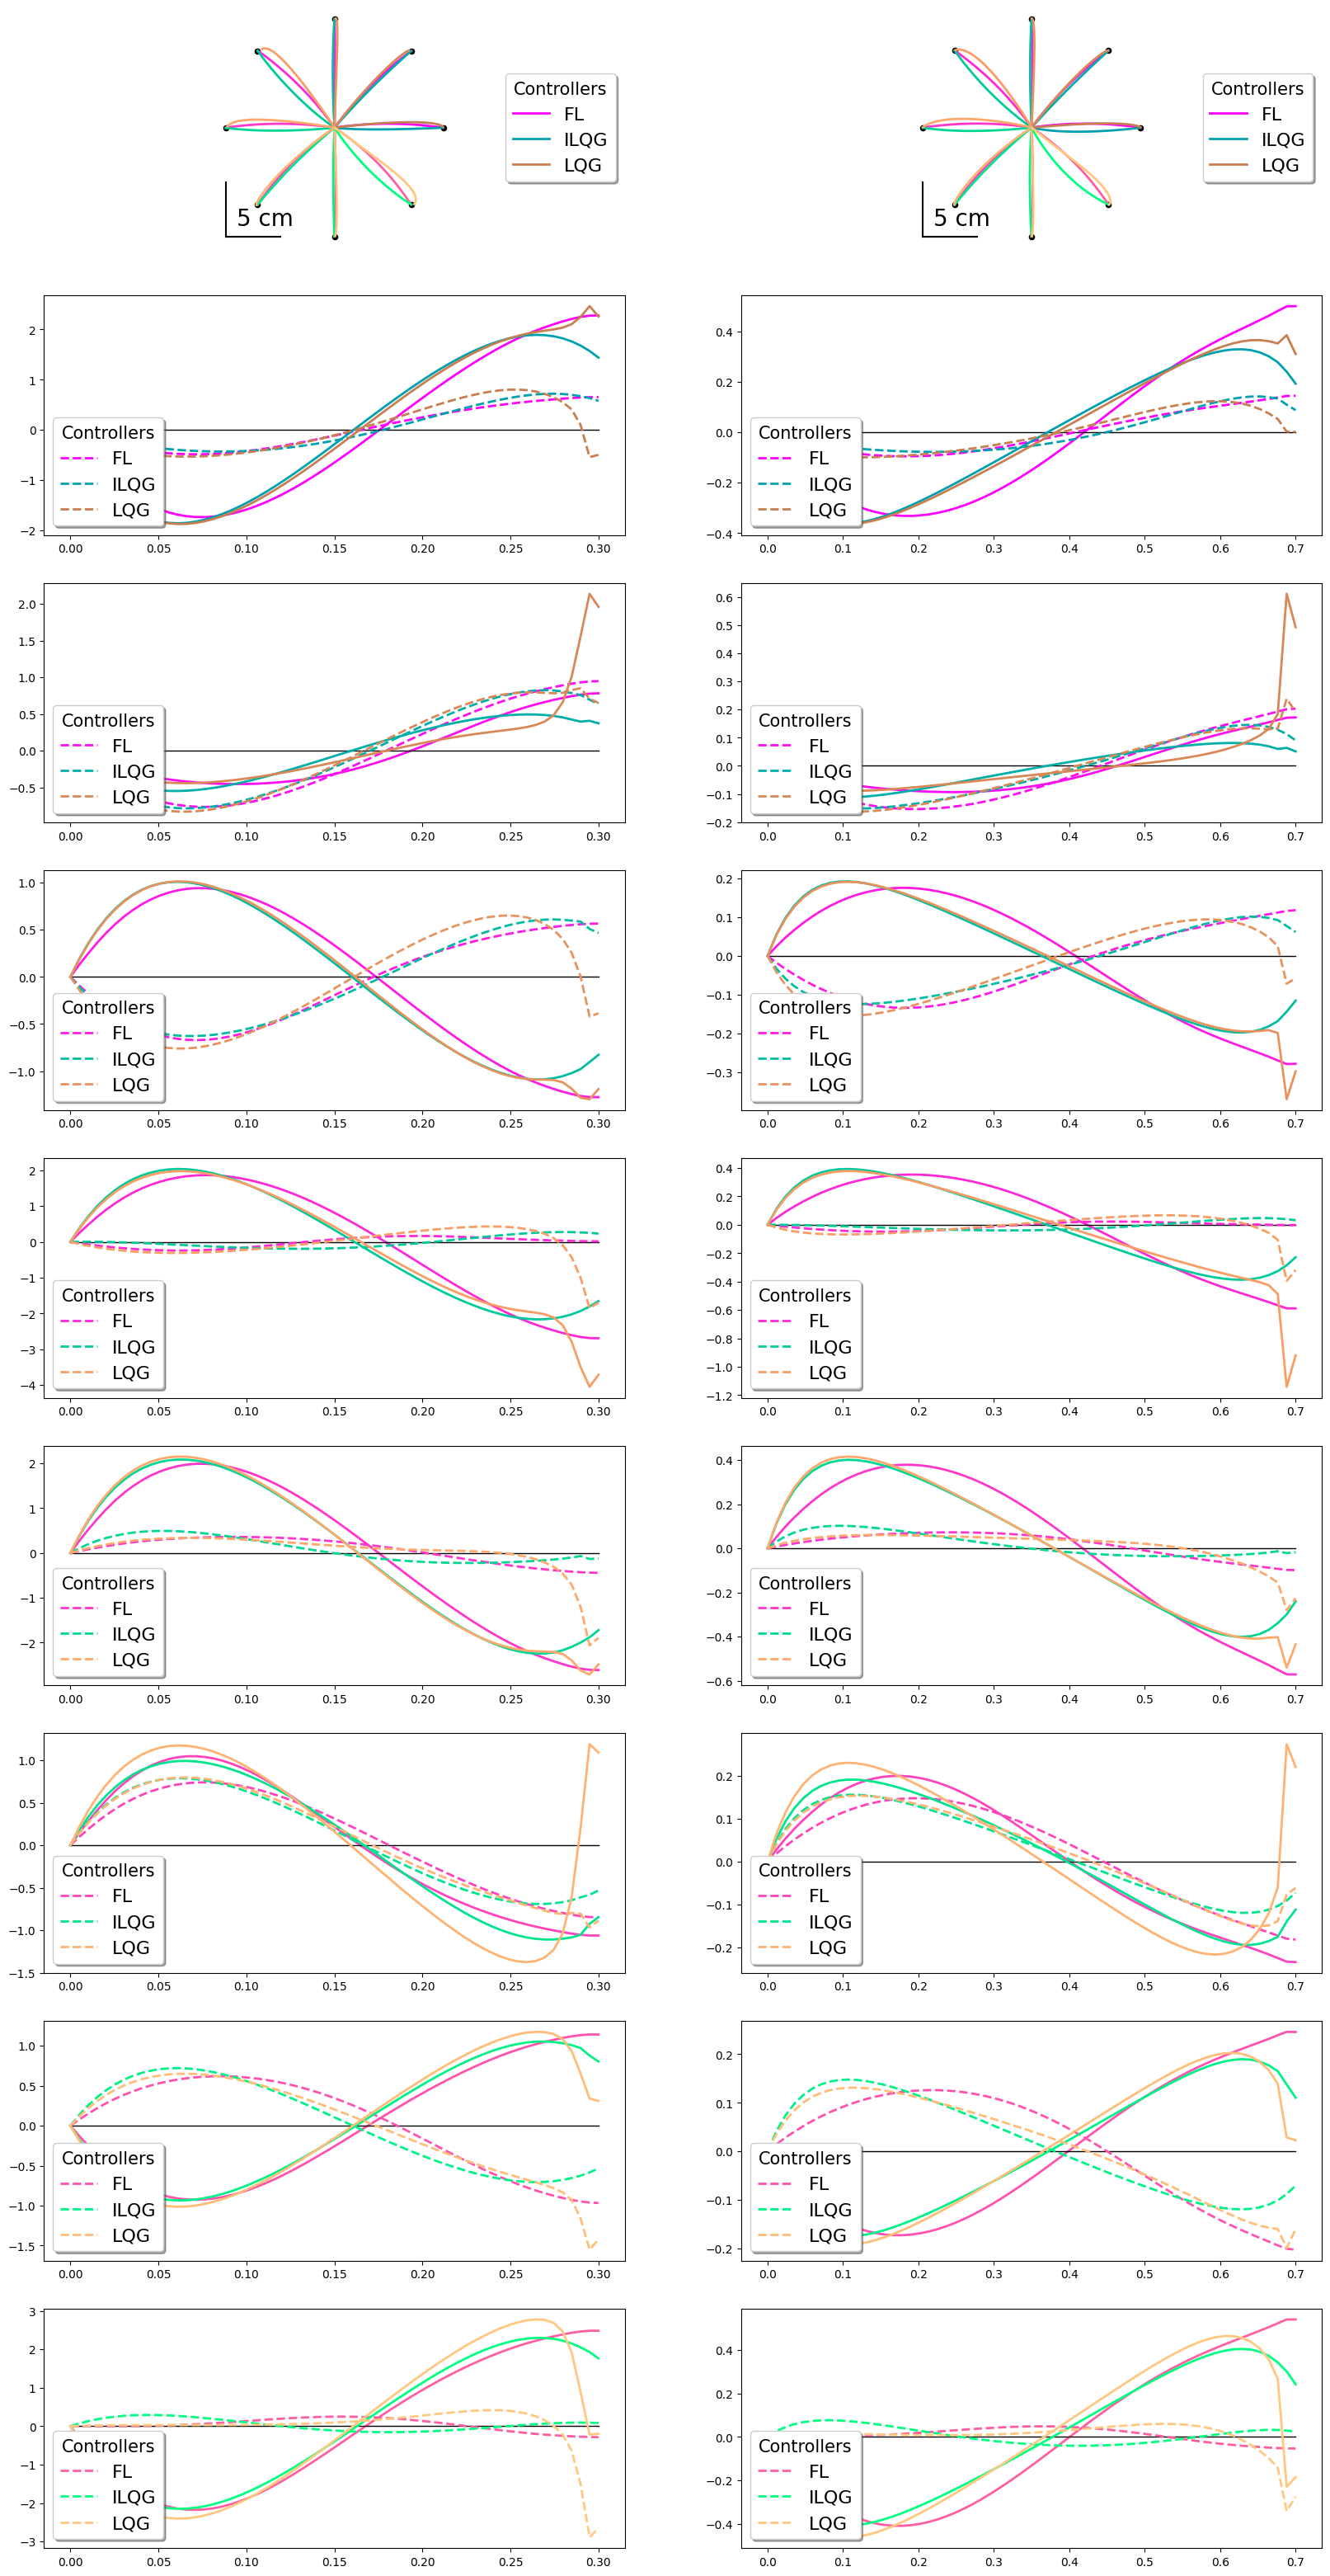

In [4]:
start = np.array([0,35])
d = 10

    # Plot results

Duration = [.3,.7]
fig,ax = plt.subplots(9,len(Duration),figsize=(20, 40))
for k in range(len(Duration)):
    colorlist1 = get_colors_from_colormap(20,"spring")[:8]
    colorlist2 = get_colors_from_colormap(20,"winter")[-8:]
    colorlist3 = get_colors_from_colormap(20,"copper")[-8:]
    for i,angles in enumerate(np.linspace(0,2*pi,9)[:-1]):
        color1,color2,color3 = colorlist1[i],colorlist2[i],colorlist3[i]
        plt.subplot(9,len(Duration),k+1)
        end = start + np.array([d*cos(angles),d*sin(angles)])
        plt.axis("equal")
        X,Y,_,x=Feedback_Linearization(Duration[k],w1=1e4,w2=1e4,w3=1,w4=1,r1 = 1e-7,r2=1e-7,starting_point=start,targets=end,plot = False,Showu=True,Num_iter=60,Delay = 0)
        plt.plot(X,Y,color = color1,linewidth = 2,label = "FL")
        
        X,Y,_,xilqg=ILQG(Duration[k],start=start,targets=end,plot = False)
        plt.plot(X,Y,color = color2,linewidth = 2,label = "ILQG")

        X,Y,_,xlqg=BestLQG(Duration[k],starting_point=start,targets=end,plot = False,Num_iter=60)
        plt.plot(X,Y,color = color3,linewidth = 2,label = "LQG")

        plt.scatter([end[0]],[end[1]],color = "black",s = 20)
        if i == 0 : MultipleLabel()
        plt.subplot(9,len(Duration),k+3+2*i)
        plt.plot(np.linspace(0,Duration[k],60),x[:,4],color = color1,linewidth = 2,label = "FL")
        plt.plot(np.linspace(0,Duration[k],60),np.zeros(60),color = "black",linewidth = 1)
        plt.plot(np.linspace(0,Duration[k],60),x[:,5],color = color1,linewidth = 2,label = "FL",linestyle = "--")
        plt.plot(np.linspace(0,Duration[k],60),xilqg[:,4],color = color2,linewidth = 2,label = "ILQG")
        plt.plot(np.linspace(0,Duration[k],60),xilqg[:,5],color = color2,linewidth = 2,label = "ILQG",linestyle = "--")
        plt.plot(np.linspace(0,Duration[k],60),xlqg[2],color = color3,linewidth = 2,label = "LQG")
        plt.plot(np.linspace(0,Duration[k],60),xlqg[5],color = color3,linewidth = 2,label = "LQG",linestyle = "--")
            
    
        MultipleLabel(side = "lower left")
    plt.subplot(9,len(Duration),k+1)
    delete_axis(ax[0,k])
    delete_ticks(ax[0,k])
    add_scale_cm(-10,25,5,fontsize =20)
plt.show()

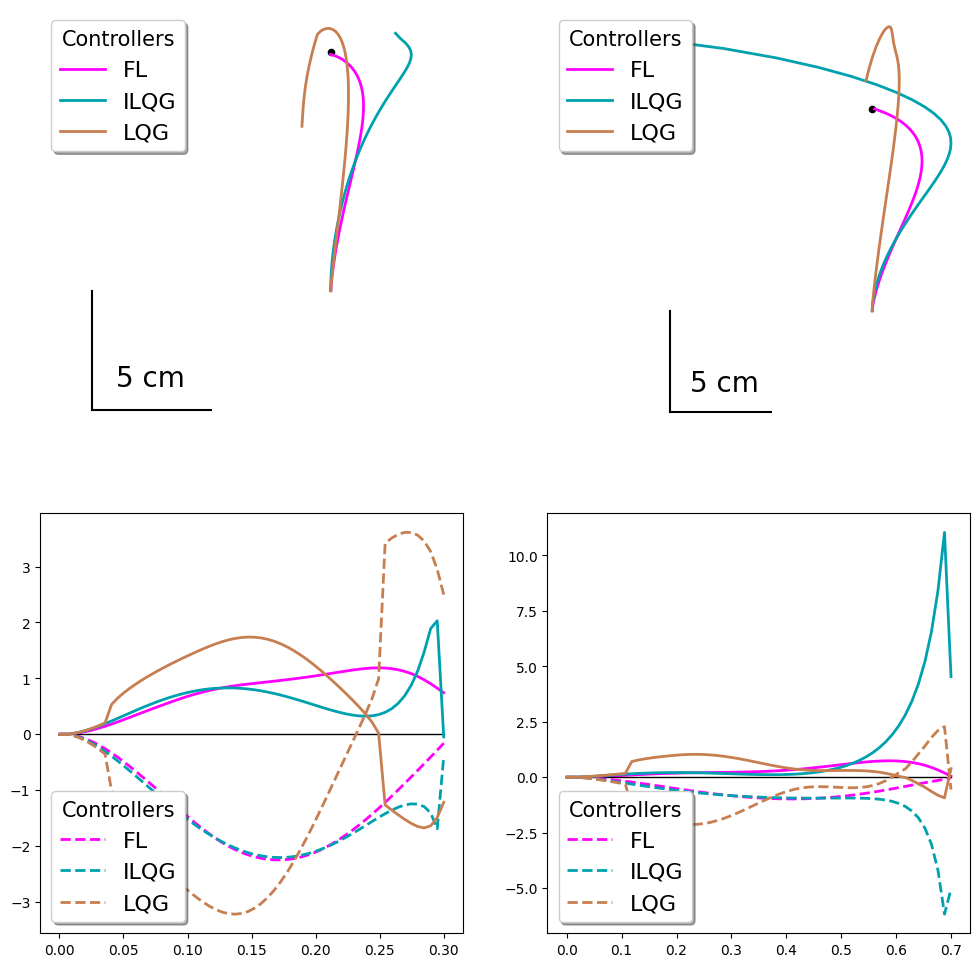

In [8]:
start = np.array([0,30])
d = 10

    # Plot results
Duration = [.3,.7]
fig,ax = plt.subplots(2,len(Duration),figsize=(12, 12))
for k in range(len(Duration)):
    colorlist1 = get_colors_from_colormap(20,"spring")[:8]
    colorlist2 = get_colors_from_colormap(20,"winter")[-8:]
    colorlist3 = get_colors_from_colormap(20,"copper")[-8:]
    for i,angles in enumerate(np.array([pi/2])):
        color1,color2,color3 = colorlist1[i],colorlist2[i],colorlist3[i]
        plt.subplot(2,len(Duration),k+1)
        end = start + np.array([d*cos(angles),d*sin(angles)])
        plt.axis("equal")
        X,Y,_,x=Feedback_Linearization(Duration[k],w1=1e4,w2=1e4,w3=1,w4=1,r1 = 1e-7,r2=1e-7,starting_point=start,targets=end,plot = False,Showu=True,Num_iter=60,Delay = .06,AdditionalDynamics=activated_ff(30))
        plt.plot(X,Y,color = color1,linewidth = 2,label = "FL")
        
        X,Y,_,xilqg=ILQG(Duration[k],start=start,targets=end,plot = False,FF = True,Side = "Right",Variance = 1e-6,Delay = .06)
        plt.plot(X,Y,color = color2,linewidth = 2,label = "ILQG")

        X,Y,_,xlqg=BestLQG(Duration[k],starting_point=start,targets=end,plot = False,Num_iter=60,AdditionalDynamics=activated_ff(30),ClassicLQG=False,plotEstimation=False,Delay = .06)
        plt.plot(X,Y,color = color3,linewidth = 2,label = "LQG")

        plt.scatter([end[0]],[end[1]],color = "black",s = 20)
        if i == 0 : MultipleLabel(side = "upper left")
        plt.subplot(2,len(Duration),k+3+2*i)
        plt.plot(np.linspace(0,Duration[k],60),x[:,2],color = color1,linewidth = 2,label = "FL")
        plt.plot(np.linspace(0,Duration[k],60),np.zeros(60),color = "black",linewidth = 1)
        plt.plot(np.linspace(0,Duration[k],60),x[:,3],color = color1,linewidth = 2,label = "FL",linestyle = "--")
        plt.plot(np.linspace(0,Duration[k],60),xilqg[:,2],color = color2,linewidth = 2,label = "ILQG")
        plt.plot(np.linspace(0,Duration[k],60),xilqg[:,3],color = color2,linewidth = 2,label = "ILQG",linestyle = "--")
        plt.plot(np.linspace(0,Duration[k],60),xlqg[1],color = color3,linewidth = 2,label = "LQG")
        plt.plot(np.linspace(0,Duration[k],60),xlqg[4],color = color3,linewidth = 2,label = "LQG",linestyle = "--")
            
    
        MultipleLabel(side = "lower left")
    plt.subplot(2,len(Duration),k+1)
    delete_axis(ax[0,k])
    delete_ticks(ax[0,k])
    add_scale_cm(-10,25,5,fontsize =20)
plt.show()

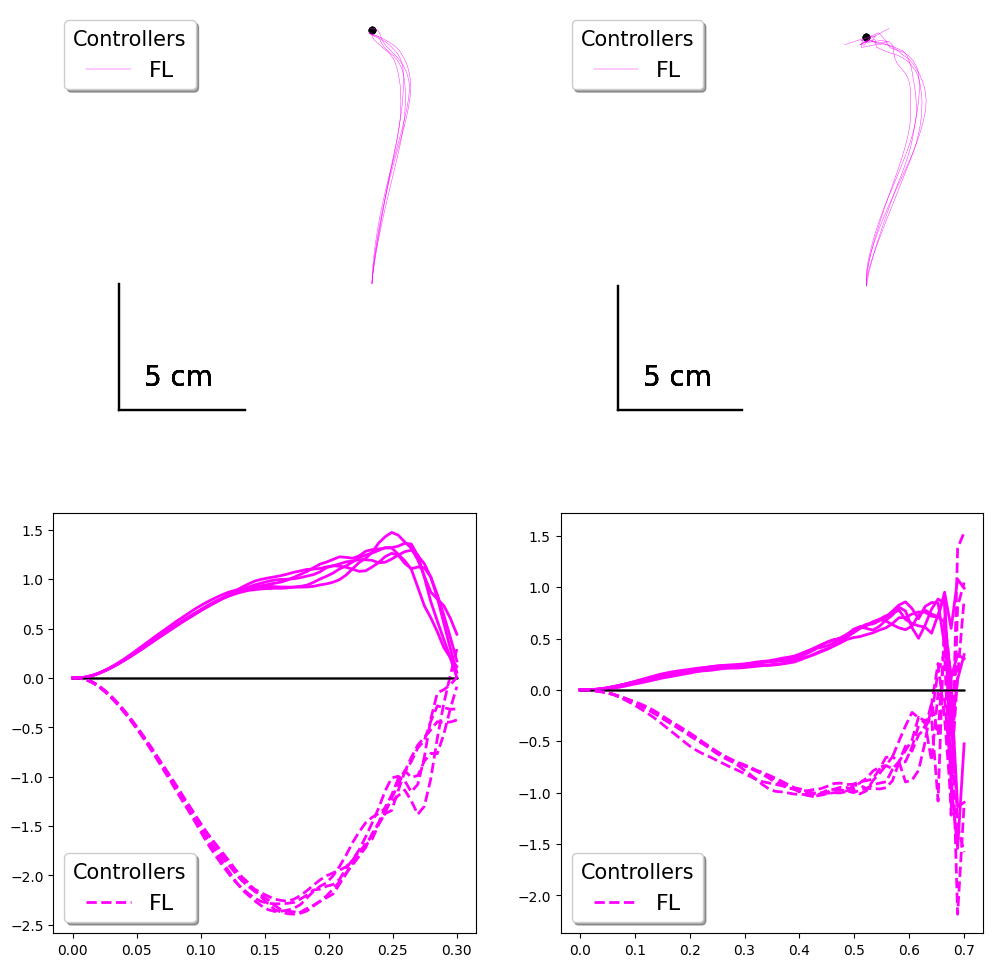

In [4]:
start = np.array([0,30])
d = 10
Duration = [.3,.7]
fig,ax = plt.subplots(2,len(Duration),figsize=(12, 12))
for N in range(5):
        # Plot results
    for k in range(len(Duration)):
        colorlist1 = get_colors_from_colormap(20,"spring")[:8]
        colorlist2 = get_colors_from_colormap(20,"winter")[-8:]
        colorlist3 = get_colors_from_colormap(20,"copper")[-8:]
        for i,angles in enumerate(np.array([pi/2])):
            color1,color2,color3 = colorlist1[i],colorlist2[i],colorlist3[i]
            plt.subplot(2,len(Duration),k+1)
            end = start + np.array([d*cos(angles),d*sin(angles)])
            plt.axis("equal")
            X,Y,_,x=Feedback_Linearization(Duration[k],w1=1e4,w2=1e4,w3=1,w4=1,r1 = 1e-8,r2=1e-8,starting_point=start,targets=end,plot = False,Showu=True,Num_iter=60,Delay = .06,AdditionalDynamics=activated_ff(30),Activate_Noise=True)
            plt.plot(X,Y,color = color1,linewidth = .3,label = "FL")

            plt.scatter([end[0]],[end[1]],color = "black",s = 20)
            if i == 0 : MultipleLabel(side = "upper left")
            plt.subplot(2,len(Duration),k+3+2*i)
            plt.plot(np.linspace(0,Duration[k],60),x[:,2],color = color1,linewidth = 2,label = "FL")
            plt.plot(np.linspace(0,Duration[k],60),np.zeros(60),color = "black",linewidth = 1)
            plt.plot(np.linspace(0,Duration[k],60),x[:,3],color = color1,linewidth = 2,label = "FL",linestyle = "--")
                
        
            MultipleLabel(side = "lower left")
        plt.subplot(2,len(Duration),k+1)
        delete_axis(ax[0,k])
        delete_ticks(ax[0,k])
        add_scale_cm(-10,25,5,fontsize =20)
plt.show()